In [1]:
import pandas as pd
import os
from get_repo_name import get_repo_name

repo_name = get_repo_name ( os.path.basename ( os.getcwd() ) )
dataset_path = f'datasets/{repo_name}_groupedby_yearmonth.csv'
df = pd.read_csv (dataset_path)
df

,year_month,commit_count,additions,deletions,agg_loc,agg_complexity,agg_token_count,dmm_unit_size,dmm_unit_complexity,dmm_unit_interfacing
0,2010-11,134,758,102,0.0,0.0,0.0,NaN,NaN,NaN
1,2011-01,11,30,6,0.0,0.0,0.0,NaN,NaN,NaN
2,2011-02,18,129,11,0.0,0.0,0.0,NaN,NaN,NaN
3,2011-03,12,196,86,0.0,0.0,0.0,NaN,NaN,NaN
4,2011-04,10,36,16,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
128,2021-11,13,60,4,0.0,0.0,0.0,NaN,NaN,NaN
129,2021-12,26,111,45,0.0,0.0,0.0,NaN,NaN,NaN
130,2022-01,6,12,5,0.0,0.0,0.0,NaN,NaN,NaN
131,2022-02,9,29,10,0.0,0.0,0.0,NaN,NaN,NaN


In [2]:
df['dmm_unit_size'] = df['dmm_unit_size'].fillna(0)
df['dmm_unit_complexity'] = df['dmm_unit_complexity'].fillna(0)
df['dmm_unit_interfacing'] = df['dmm_unit_interfacing'].fillna(0)

In [3]:
start_date = df.year_month[0][5:7] + '-01-' + df.year_month[0][0:4]
end_date = df.year_month[len(df.year_month) - 1][5:7] + '-01-' + df.year_month[len(df.year_month) - 1][0:4]
dfperiod = pd.period_range(start_date, end_date, freq='M')

def new_zero_row ( year_month ):
    
    new_row = {
        'year_month': year_month,
        'commit_count': 0,
        'additions': 0,
        'deletions': 0,
        'agg_loc': 0,
        'agg_complexity': 0,
        'agg_token_count': 0,
        'dmm_unit_size': 0,
        'dmm_unit_complexity': 0,
        'dmm_unit_interfacing': 0
    }
    
    return new_row

for year_month in dfperiod:
    if df [ ( df['year_month'] == str(year_month) ) ].shape[0] == 0:
        df = df.append ( new_zero_row(year_month), ignore_index = True )

df.shape

(139, 10)

In [4]:
df['year_month'] = df['year_month'].astype(str)
df = df.sort_values ( by=['year_month'] )
df.reset_index(drop=True, inplace=True)
df

,year_month,commit_count,additions,deletions,agg_loc,agg_complexity,agg_token_count,dmm_unit_size,dmm_unit_complexity,dmm_unit_interfacing
0,2010-11,134,758,102,0.0,0.0,0.0,0.0,0.0,0.0
1,2010-12,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011-01,11,30,6,0.0,0.0,0.0,0.0,0.0,0.0
3,2011-02,18,129,11,0.0,0.0,0.0,0.0,0.0,0.0
4,2011-03,12,196,86,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
134,2022-01,6,12,5,0.0,0.0,0.0,0.0,0.0,0.0
135,2022-02,9,29,10,0.0,0.0,0.0,0.0,0.0,0.0
136,2022-03,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
137,2022-04,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.to_csv ( f'datasets/{repo_name}_final.csv', index = False )

# Analysis

In [6]:
for idx in range(1, 10):
    ma_prefix = 'ma_'
    df[ma_prefix + df.columns[idx]] = df[df.columns[idx]].rolling ( window = 3 ).mean()
df

,year_month,commit_count,additions,deletions,agg_loc,agg_complexity,agg_token_count,dmm_unit_size,dmm_unit_complexity,dmm_unit_interfacing,ma_commit_count,ma_additions,ma_deletions,ma_agg_loc,ma_agg_complexity,ma_agg_token_count,ma_dmm_unit_size,ma_dmm_unit_complexity,ma_dmm_unit_interfacing
0,2010-11,134,758,102,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-12,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-01,11,30,6,0.0,0.0,0.0,0.0,0.0,0.0,48.333333,262.666667,36.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,2011-02,18,129,11,0.0,0.0,0.0,0.0,0.0,0.0,9.666667,53.000000,5.666667,0.0,0.0,0.0,0.0,0.0,0.0
4,2011-03,12,196,86,0.0,0.0,0.0,0.0,0.0,0.0,13.666667,118.333333,34.333333,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,2022-01,6,12,5,0.0,0.0,0.0,0.0,0.0,0.0,15.000000,61.000000,18.000000,0.0,0.0,0.0,0.0,0.0,0.0
135,2022-02,9,29,10,0.0,0.0,0.0,0.0,0.0,0.0,13.666667,50.666667,20.000000,0.0,0.0,0.0,0.0,0.0,0.0
136,2022-03,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000,13.666667,5.000000,0.0,0.0,0.0,0.0,0.0,0.0
137,2022-04,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,9.666667,3.333333,0.0,0.0,0.0,0.0,0.0,0.0


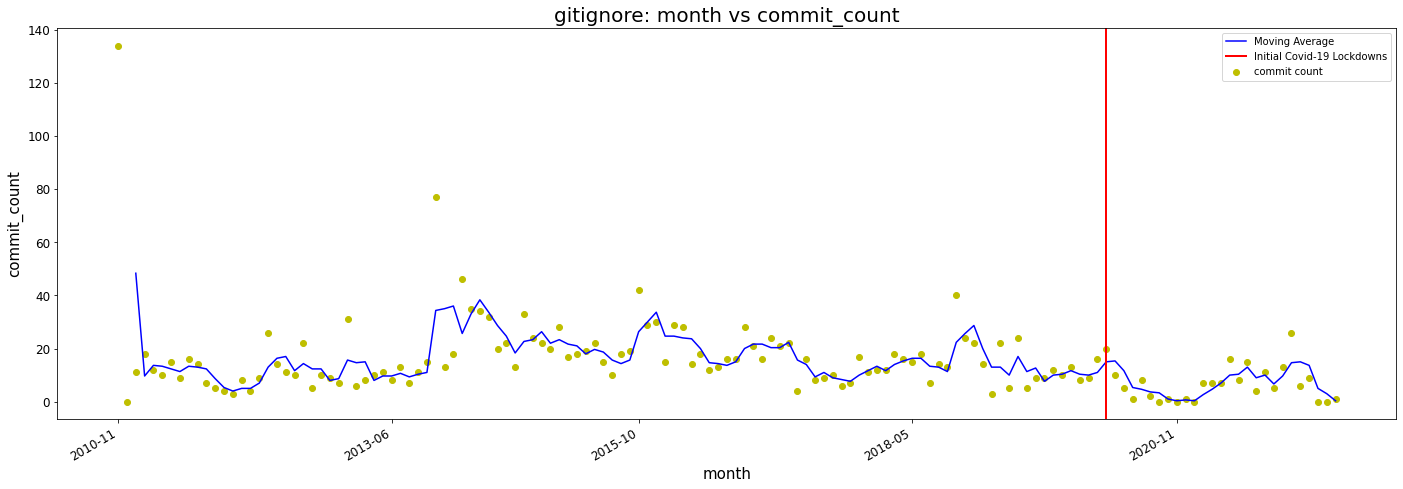

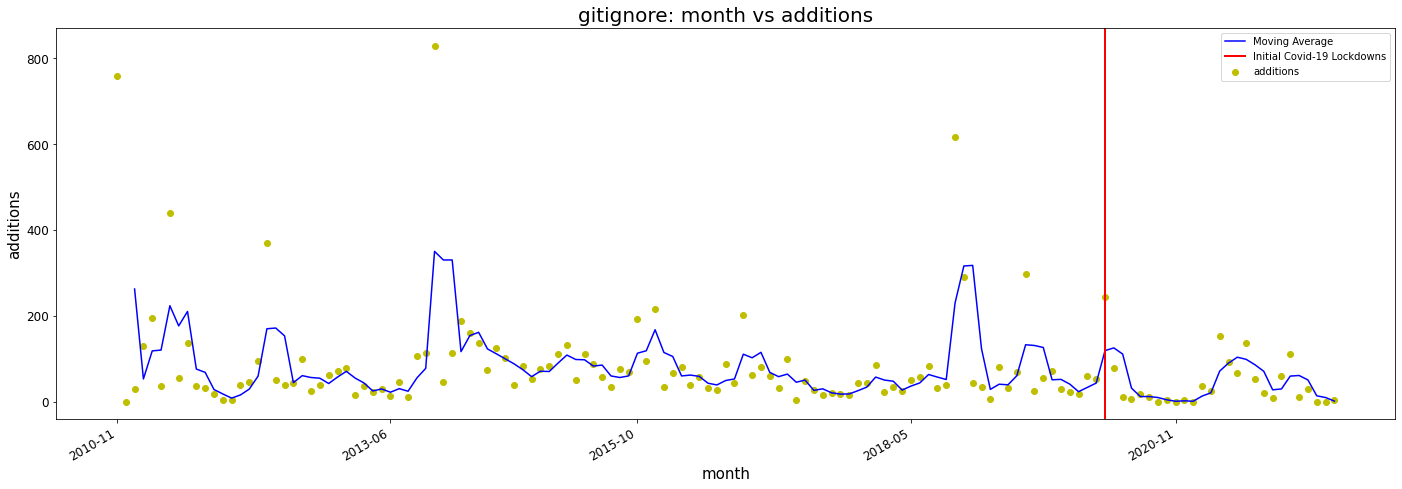

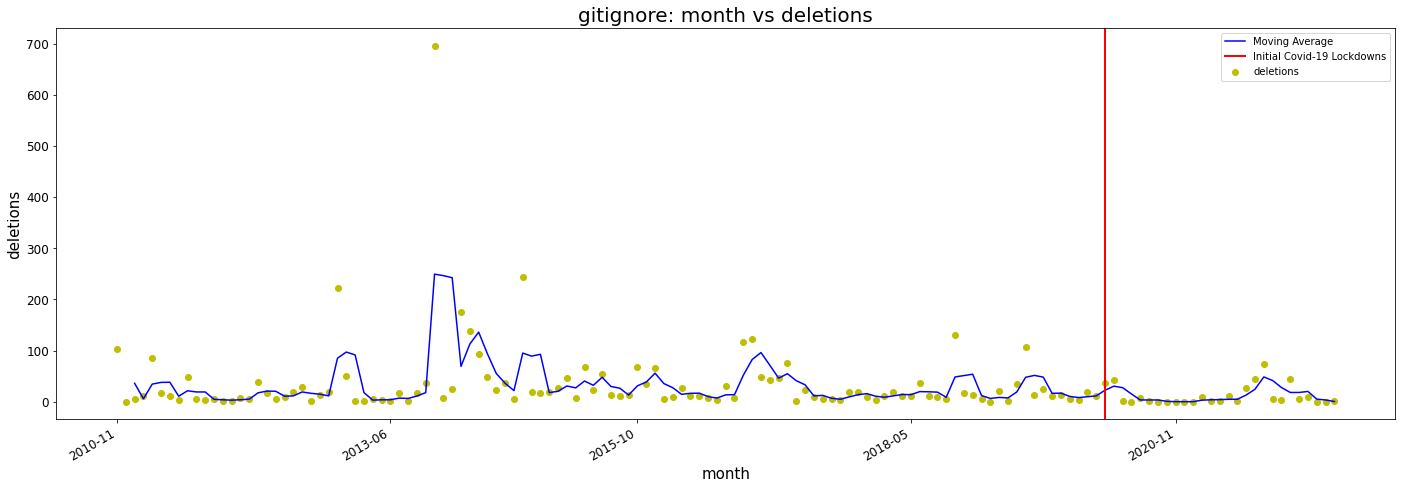

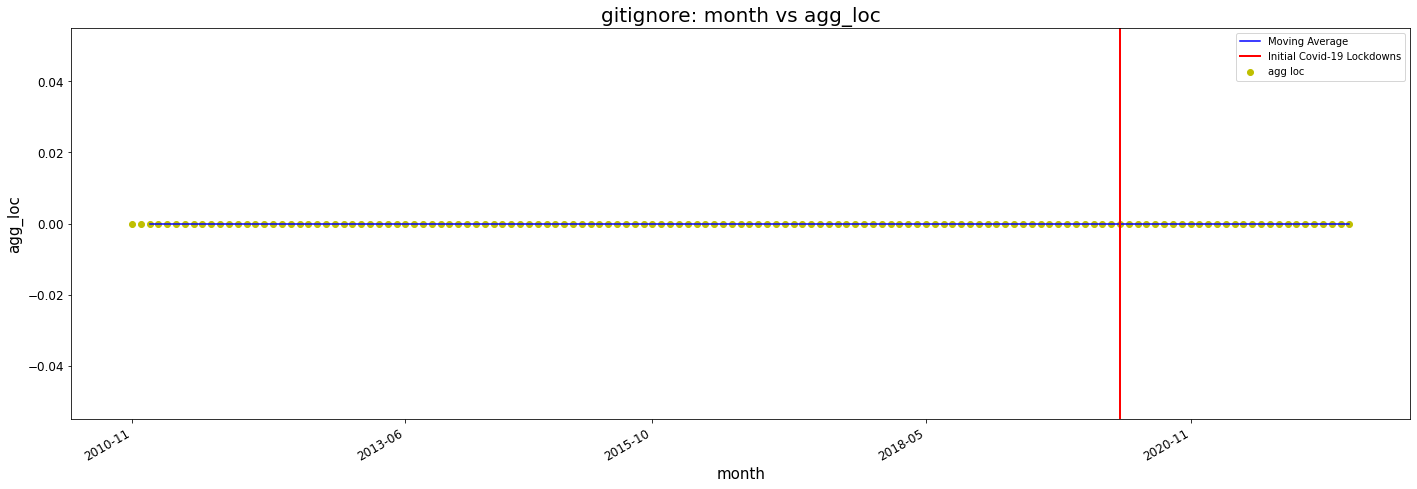

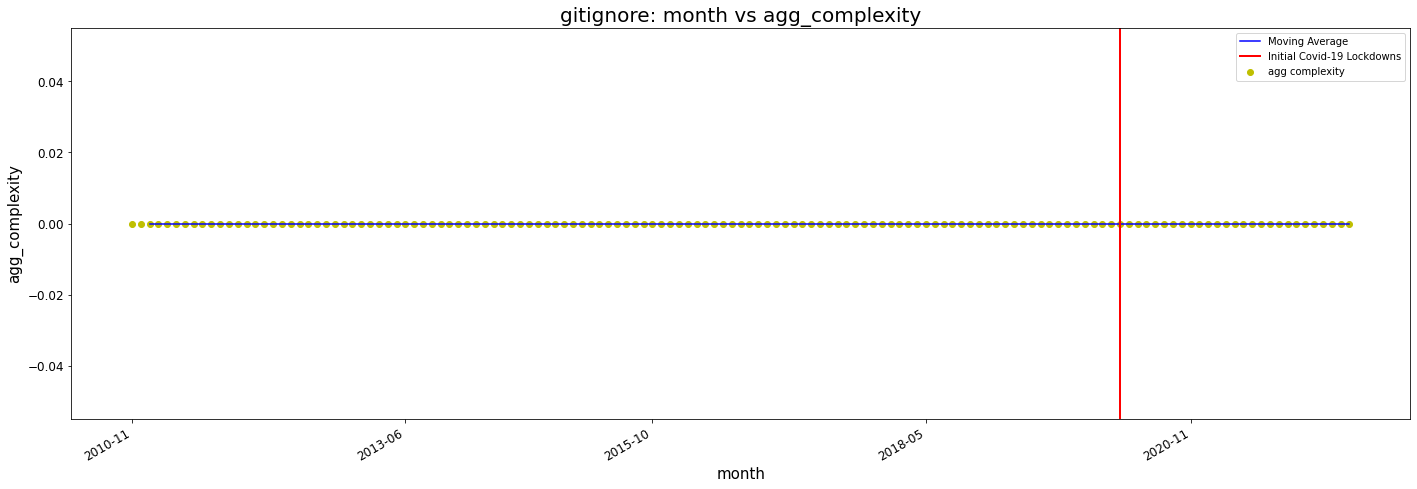

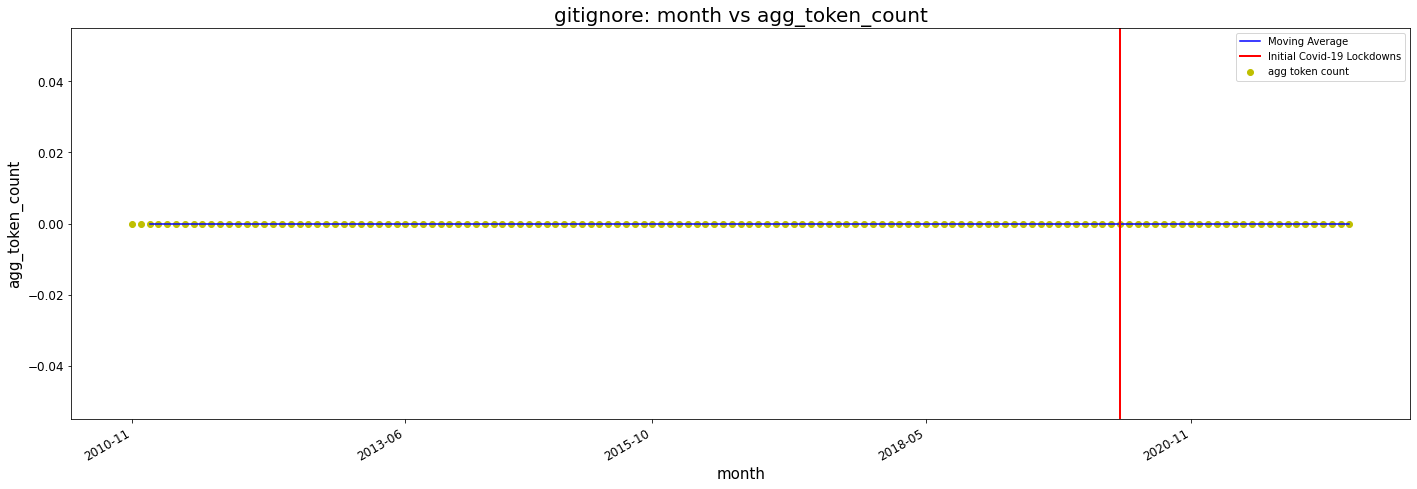

In [7]:
from plot_line_lib import plot_line

for idx in range ( 1, 7 ):
    
    images_path = f'images/'
    plot_line ( df.columns[idx], idx, df, images_path, repo_name, major_locator = True )

In [8]:
from analysis_lib import year_pre_covid_ym, pre_covid_ym, covid_ym, year_post_covid_ym

df = df.set_index(df['year_month'])

df1 = df [ year_pre_covid_ym : pre_covid_ym ]
df2 = df [ covid_ym : year_post_covid_ym ]
df1 = df1.reset_index ( drop = True )
df2 = df2.reset_index ( drop = True )

df1.shape, df2.shape

((12, 19), (12, 19))

In [9]:
from analysis_lib import calc_and_compare_means

calc_and_compare_means ( df1, df2 )

Pre and Post-Covid Mean Comparisons:
commit count :  12  vs  5  ->  Down (58.3%)
additions :  68  vs  34  ->  Down (50.0%)
deletions :  22  vs  8  ->  Down (63.6%)
agg loc :  0  vs  0  ->  No change
agg complexity :  0  vs  0  ->  No change
agg token count :  0  vs  0  ->  No change


# Distribution

In [10]:
from analysis_lib import get_equilibrium_pc

print("Pre-pandemic equilibrium percentages:")
for idx in range ( 1, 7 ):
    print ( f'{df1.columns[idx]} = { get_equilibrium_pc ( list ( df1[df1.columns[idx]] ) ) }' )
    
print("\nPost-pandemic equilibrium percentages:")
for idx in range ( 1, 7 ):
    print ( f'{df2.columns[idx]} = { get_equilibrium_pc ( list ( df2[df2.columns[idx]] ) ) }' )

Pre-pandemic equilibrium percentages:
commit_count = 33.3
additions = 25.0
deletions = 16.7
agg_loc = 8.3
agg_complexity = 8.3
agg_token_count = 8.3

Post-pandemic equilibrium percentages:
commit_count = 16.7
additions = 8.3
deletions = 16.7
agg_loc = 8.3
agg_complexity = 8.3
agg_token_count = 8.3


In [11]:
from analysis_lib import get_pareto_pc

print("Pre-pandemic pareto percentages:")
for idx in range ( 1, 7 ):
    print ( f'{df1.columns[idx]} = { get_pareto_pc ( list ( df1[df1.columns[idx]] ) ) }' )
    
print("\nPost-pandemic pareto percentages:")
for idx in range ( 1, 7 ):
    print ( f'{df2.columns[idx]} = { get_pareto_pc ( list ( df2[df2.columns[idx]] ) ) }' )

Pre-pandemic pareto percentages:
commit_count = 66.7
additions = 58.3
deletions = 50.0
agg_loc = 8.3
agg_complexity = 8.3
agg_token_count = 8.3

Post-pandemic pareto percentages:
commit_count = 33.3
additions = 25.0
deletions = 25.0
agg_loc = 8.3
agg_complexity = 8.3
agg_token_count = 8.3
